<a href="https://colab.research.google.com/github/Seongjin1225/AI-School-9_Mid_Project_Team2/blob/main/%EA%B0%9C%EC%9D%B8%20%EC%BD%94%EB%93%9C/Mid_Project_%EC%84%9C%EC%9A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시 자치구별 데이터 분석 및 시각화

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,763 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direc

In [ ]:
import pandas as pd
import glob

# 서울 -> 서울
data2 = glob.glob(r'/content/drive/MyDrive/Mid_Project/서울-서울/from_to_seoul_*.csv')
data2.sort(reverse=True)

head_df2 = pd.read_csv('/content/drive/MyDrive/Mid_Project/서울-서울/from_to_seoul_2309.csv', encoding='cp949')
col2 = head_df2.columns
from_to_seoul = pd.DataFrame()

for file in data2:
    df2 = pd.read_csv(file, encoding='cp949')
    df2.columns = col2
    from_to_seoul = pd.concat([from_to_seoul, df2])

# 전국 -> 서울
data3 = glob.glob(r'/content/drive/MyDrive/Mid_Project/전국-서울/to_seoul_*.csv')
data3.sort(reverse=True)

head_df3 = pd.read_csv('/content/drive/MyDrive/Mid_Project/전국-서울/to_seoul_2309.csv', encoding='cp949')
col3 = head_df3.columns
to_seoul = pd.DataFrame()

for file in data3:
    df3 = pd.read_csv(file, encoding='cp949')
    df3.columns = col3
    to_seoul = pd.concat([to_seoul, df3])

print(from_to_seoul.columns)
print(to_seoul.columns)


Index(['배송년월일', '송하인_시명', '송하인_시코드', '송하인_구명', '송하인_구코드', '수하인_시명', '수하인_시코드',
       '수하인_구명', '수하인_구코드', '대분류_착지물동량 가구/인테리어', '대분류_착지물동량 기타',
       '대분류_착지물동량 도서/음반', '대분류_착지물동량 디지털/가전', '대분류_착지물동량 생활/건강',
       '대분류_착지물동량 스포츠/레저', '대분류_착지물동량 식품', '대분류_착지물동량 출산/육아', '대분류_착지물동량 패션의류',
       '대분류_착지물동량 패션잡화', '대분류_착지물동량 화장품/미용'],
      dtype='object')
Index(['배송년월일', '송하인_시명', '송하인_시코드', '수하인_시명', '수하인_시코드', '수하인_구명', '수하인_구코드',
       '대분류_착지물동량 가구/인테리어', '대분류_착지물동량 기타', '대분류_착지물동량 도서/음반',
       '대분류_착지물동량 디지털/가전', '대분류_착지물동량 생활/건강', '대분류_착지물동량 스포츠/레저',
       '대분류_착지물동량 식품', '대분류_착지물동량 출산/육아', '대분류_착지물동량 패션의류', '대분류_착지물동량 패션잡화',
       '대분류_착지물동량 화장품/미용'],
      dtype='object')


In [ ]:
# 필요 데이터 가져와 새로운 데이터프레임 만들기
# 도착지가 서울인 데이터를 필요
# 배송년월일, 송하인_구명, 카테고리들, 이렇게 가져와서 합치기

# 전국 - 서울 데이터에서 추출 및 컬럼 이름 변경
first = to_seoul[['배송년월일','수하인_구명','대분류_착지물동량 가구/인테리어','대분류_착지물동량 기타',
                  '대분류_착지물동량 도서/음반', '대분류_착지물동량 디지털/가전', '대분류_착지물동량 생활/건강',
                  '대분류_착지물동량 스포츠/레저', '대분류_착지물동량 식품', '대분류_착지물동량 출산/육아', '대분류_착지물동량 패션의류',
                  '대분류_착지물동량 패션잡화', '대분류_착지물동량 화장품/미용']]

first.rename(columns={'수하인_구명':'구명','대분류_착지물동량 가구/인테리어':'가구/인테리어', '대분류_착지물동량 기타':'기타',
                     '대분류_착지물동량 도서/음반':'도서/음반', '대분류_착지물동량 디지털/가전':'디지털/가전',
                     '대분류_착지물동량 생활/건강':'생활/건강', '대분류_착지물동량 스포츠/레저':'스포츠/레저', '대분류_착지물동량 식품':'식품',
                     '대분류_착지물동량 출산/육아':'출산/육아', '대분류_착지물동량 패션의류':'패션의류', '대분류_착지물동량 패션잡화':'패션잡화',
                     '대분류_착지물동량 화장품/미용':'화장품/미용'},inplace=True)

# 서울 - 서울 데이터에서 추출 및 컬럼 이름 변경
second = from_to_seoul[['배송년월일','수하인_구명','대분류_착지물동량 가구/인테리어','대분류_착지물동량 기타',
                  '대분류_착지물동량 도서/음반', '대분류_착지물동량 디지털/가전', '대분류_착지물동량 생활/건강',
                  '대분류_착지물동량 스포츠/레저', '대분류_착지물동량 식품', '대분류_착지물동량 출산/육아', '대분류_착지물동량 패션의류',
                  '대분류_착지물동량 패션잡화', '대분류_착지물동량 화장품/미용']]

second.rename(columns={'수하인_구명':'구명','대분류_착지물동량 가구/인테리어':'가구/인테리어', '대분류_착지물동량 기타':'기타',
                     '대분류_착지물동량 도서/음반':'도서/음반', '대분류_착지물동량 디지털/가전':'디지털/가전',
                     '대분류_착지물동량 생활/건강':'생활/건강', '대분류_착지물동량 스포츠/레저':'스포츠/레저', '대분류_착지물동량 식품':'식품',
                     '대분류_착지물동량 출산/육아':'출산/육아', '대분류_착지물동량 패션의류':'패션의류', '대분류_착지물동량 패션잡화':'패션잡화',
                     '대분류_착지물동량 화장품/미용':'화장품/미용'},inplace=True)
second.head()

# 합쳐서 최종 활용 데이터프레임 작성
data = pd.concat([first, second])
data

<ipython-input-2-f65d6eb5bfbd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first.rename(columns={'수하인_구명':'구명','대분류_착지물동량 가구/인테리어':'가구/인테리어', '대분류_착지물동량 기타':'기타',
<ipython-input-2-f65d6eb5bfbd>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second.rename(columns={'수하인_구명':'구명','대분류_착지물동량 가구/인테리어':'가구/인테리어', '대분류_착지물동량 기타':'기타',


,배송년월일,구명,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용
0,20230930,강동구,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20230930,송파구,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20230930,강남구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20230930,서초구,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20230930,관악구,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18412,20210124,은평구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18413,20210124,강서구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18414,20210124,구로구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18415,20210124,동작구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 데이터 프레임 전처리
data.dtypes

# 배송년월일 데이터 타입 날짜형으로 변경
data['배송년월일'] = data['배송년월일'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
data.head()



,배송년월일,구명,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용
0,2023-09-30,강동구,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-09-30,송파구,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-09-30,강남구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-09-30,서초구,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-09-30,관악구,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 총합 컬럼 추가
data['총합'] = data.sum(axis=1)
data.head()

<ipython-input-4-b01997b4f51f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['총합'] = data.sum(axis=1)


,배송년월일,구명,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총합
0,2023-09-30,강동구,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,2023-09-30,송파구,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,2023-09-30,강남구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-09-30,서초구,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,2023-09-30,관악구,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


 # 데이터 분석

<ipython-input-7-0553726b534a>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  target = data.groupby(['배송년월일']).sum().reset_index()


[Text(1, 0, '가구/인테리어'),
 Text(2, 0, '기타'),
 Text(3, 0, '도서/음반'),
 Text(4, 0, '디지털/가전'),
 Text(5, 0, '생활/건강'),
 Text(6, 0, '스포츠/레저'),
 Text(7, 0, '식품'),
 Text(8, 0, '출산/육아'),
 Text(9, 0, '패션의류'),
 Text(10, 0, '패션잡화'),
 Text(11, 0, '화장품/미용'),
 Text(12, 0, '총합')]

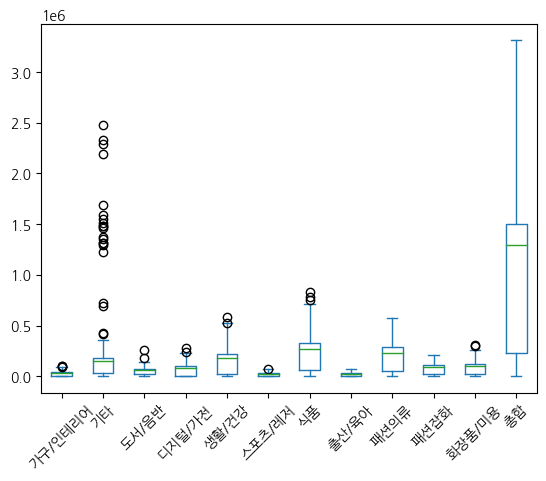

In [ ]:
import matplotlib.pyplot as plt

# 일별, 자치구별 통합
target = data.groupby(['배송년월일']).sum().reset_index()
plt.rc('font', family='NanumGothic')
graph = target.plot.box()

graph.set_xticklabels(graph.get_xticklabels(), rotation=45)

In [ ]:
# 서울시 구별 택배량 총합 지도 시각화
# 데이터 전처리

info = data.groupby(['구명'])['총합'].sum().reset_index()

# 지도 시각화 위한 라이브러리 탑재
import folium
import json
from folium import Map, Choropleth, Marker
from folium.features import DivIcon

# # 지도 생성
map = folium.Map(location=[37.56, 126.97], zoom_start=12)

locs = {"강동구":(37.55591, 127.1354),
        "송파구":(37.51102, 127.1016),
        "강남구":(37.49829, 127.0394),
        "서초구":(37.48855, 126.9878),
        "동작구":(37.50472, 126.9420),
        "관악구":(37.47081, 126.9270),
        "금천구":(37.45604, 126.8963),
        "영등포구":(37.52560, 126.9041),
        "용산구":(37.53801, 126.9709),
        "구로구":(37.49910, 126.8334),
        "양천구":(37.52323, 126.8405),
        "강서구":(37.56192, 126.8082),
        "마포구":(37.56212, 126.8876),
        "서대문구":(37.57946, 126.9206),
        "은평구":(37.61690, 126.9134),
        "중구":(37.56211, 126.9815),
        "종로구":(37.58347, 126.9726),
        "광진구":(37.54771, 127.0695),
        "성동구":(37.55151, 127.0311),
        "동대문구":(37.58462, 127.0380),
        "성북구":(37.60572, 127.0084),
        "중랑구":(37.60120, 127.0799),
        "노원구":(37.64055, 127.0651),
        "강북구":(37.63934, 126.9999),
        "도봉구":(37.67042, 127.0195)}

# 서울시 구별 경계 데이터
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

# Choropleth를 사용하여 지도에 시각화합니다
folium.Choropleth(
    geo_data=state_geo,
    data=info,
    columns=['구명', '총합'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    color='black',
    legend_name='배송량 총합'
).add_to(map)

# 지도 위 텍스트 표시
for key, value in locs.items():
    Marker(
        [value[0], value[1]],
        icon=DivIcon(
            icon_size=(0, 0),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 1.5rem; color: black; background-color:rgba(255, 255, 255, 0.2); width:85px; '\
            f'text-align:center; margin:0px;"><b>{key}</b></div>'
        )
    ).add_to(map)

map

In [ ]:
# 서울시 구별 택배량 총합 지도 시각화
# 데이터 전처리

info = data.groupby(['구명']).mean().reset_index()

# 지도 시각화 위한 라이브러리 탑재
import folium
import json
from folium import Map, Choropleth, Marker
from folium.features import DivIcon
# # 지도 생성
map = folium.Map(location=[37.56, 126.97], zoom_start=12)

locs = {"강동구":(37.55591, 127.1354),
        "송파구":(37.51102, 127.1016),
        "강남구":(37.49829, 127.0394),
        "서초구":(37.48855, 126.9878),
        "동작구":(37.50472, 126.9420),
        "관악구":(37.47081, 126.9270),
        "금천구":(37.45604, 126.8963),
        "영등포구":(37.52560, 126.9041),
        "용산구":(37.53801, 126.9709),
        "구로구":(37.49910, 126.8334),
        "양천구":(37.52323, 126.8405),
        "강서구":(37.56192, 126.8082),
        "마포구":(37.56212, 126.8876),
        "서대문구":(37.57946, 126.9206),
        "은평구":(37.61690, 126.9134),
        "중구":(37.56211, 126.9815),
        "종로구":(37.58347, 126.9726),
        "광진구":(37.54771, 127.0695),
        "성동구":(37.55151, 127.0311),
        "동대문구":(37.58462, 127.0380),
        "성북구":(37.60572, 127.0084),
        "중랑구":(37.60120, 127.0799),
        "노원구":(37.64055, 127.0651),
        "강북구":(37.63934, 126.9999),
        "도봉구":(37.67042, 127.0195)}

# 서울시 구별 경계 데이터
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

# Choropleth를 사용하여 지도에 시각화합니다
folium.Choropleth(
    geo_data=state_geo,
    data=info,
    columns=['구명', '총합'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color='black',
    legend_name='평균 배송량 총합'
).add_to(map)

# 지도 위 텍스트 표시
for key, value in locs.items():
    Marker(
        [value[0], value[1]],
        icon=DivIcon(
            icon_size=(0, 0),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 1.5rem; color: black; background-color:rgba(255, 255, 255, 0.2); width:85px; '\
            f'text-align:center; margin:0px;"><b>{key}</b></div>'
        )
    ).add_to(map)

map

<ipython-input-6-918841b6ad95>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  info = data.groupby(['구명']).mean().reset_index()


# 카테고리별 배송량 상위 5개구 그래프 시각화

In [ ]:
# 데이터 전처리

# 카테고리별 분류
furni = data[['구명','가구/인테리어']].groupby('구명').mean()
furni = furni['가구/인테리어'].nlargest(5)

other = data[['구명','기타']].groupby('구명').mean()
other = other['기타'].nlargest(5)

book =  data[['구명','도서/음반']].groupby('구명').mean()
book = book['도서/음반'].nlargest(5)

digi =  data[['구명','디지털/가전']].groupby('구명').mean()
digi = digi['디지털/가전'].nlargest(5)

life =  data[['구명','생활/건강']].groupby('구명').mean()
life = life['생활/건강'].nlargest(5)

sports = data[['구명','스포츠/레저']].groupby('구명').mean()
sports = sports['스포츠/레저'].nlargest(5)

food =  data[['구명','식품']].groupby('구명').mean()
food = food['식품'].nlargest(5)

baby =  data[['구명','출산/육아']].groupby('구명').mean()
baby = baby['출산/육아'].nlargest(5)

clothes =  data[['구명','패션의류']].groupby('구명').mean()
clothes = clothes['패션의류'].nlargest(5)

acc =  data[['구명','패션잡화']].groupby('구명').mean()
acc = acc['패션잡화'].nlargest(5)

beauty =  data[['구명','화장품/미용']].groupby('구명').mean()
beauty = beauty['화장품/미용'].nlargest(5)

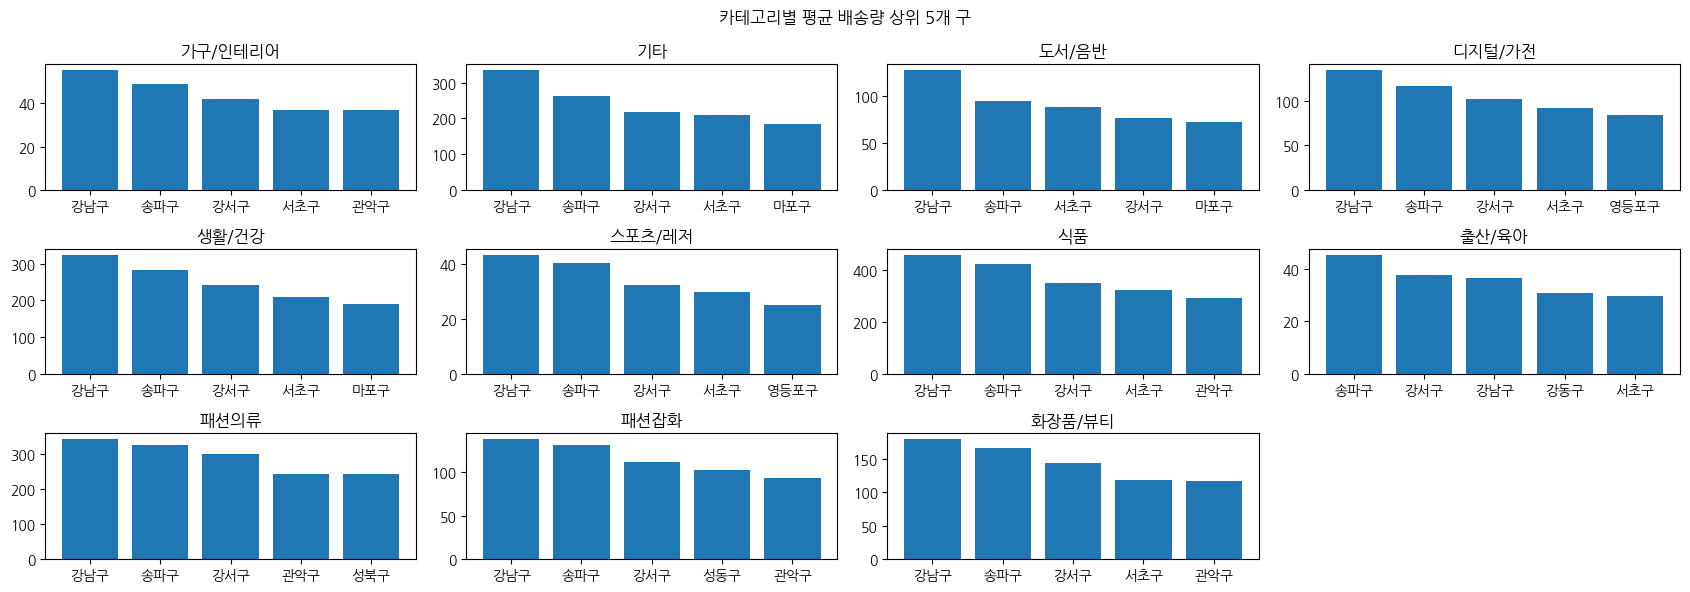

In [ ]:
# 그래프 시각화
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(17,6))
plt.suptitle('카테고리별 평균 배송량 상위 5개 구')

fig.add_subplot(3,4,1)
plt.title('가구/인테리어')
plt.bar(furni.index, furni.values)

fig.add_subplot(3,4,2)
plt.title('기타')
plt.bar(other.index, other.values)

fig.add_subplot(3,4,3)
plt.title('도서/음반')
plt.bar(book.index, book.values)

fig.add_subplot(3,4,4)
plt.title('디지털/가전')
plt.bar(digi.index, digi.values)

fig.add_subplot(3,4,5)
plt.title('생활/건강')
plt.bar(life.index, life.values)

fig.add_subplot(3,4,6)
plt.title('스포츠/레저')
plt.bar(sports.index, sports.values)

fig.add_subplot(3,4,7)
plt.title('식품')
plt.bar(food.index, food.values)

fig.add_subplot(3,4,8)
plt.title('출산/육아')
plt.bar(baby.index, baby.values)

fig.add_subplot(3,4,9)
plt.title('패션의류')
plt.bar(clothes.index, clothes.values)

fig.add_subplot(3,4,10)
plt.title('패션잡화')
plt.bar(acc.index, acc.values)

fig.add_subplot(3,4,11)
plt.title('화장품/뷰티')
plt.bar(beauty.index, beauty.values)

plt.tight_layout()  # 간격 조절해 서로 겹치지 않게 하기 위함

# 요일별 인기 카테고리 순서 시각화

In [ ]:
# 요일별 인기 카테고리 구하기
# 요일 컬럼 추가
data['요일'] = pd.to_datetime(data['배송년월일']).dt.day_name()

# 데이터 전처리
mon = data[data.요일 == 'Monday'].drop(['배송년월일','총합'],axis=1)
tue = data[data.요일 == 'Tuesday'].drop(['배송년월일','총합'],axis=1)
wed = data[data.요일 == 'Wednesday'].drop(['배송년월일','총합'],axis=1)
thu = data[data.요일 == 'Thursday'].drop(['배송년월일','총합'],axis=1)
fri = data[data.요일 == 'Friday'].drop(['배송년월일','총합'],axis=1)
sat = data[data.요일 == 'Saturday'].drop(['배송년월일','총합'],axis=1)
sun = data[data.요일 == 'Sunday'].drop(['배송년월일','총합'],axis=1)

# 요일별 배송량 카테고리 내림차순 정렬
mond = mon.groupby('요일').sum()
monday = mond.sum().sort_values(ascending=False)
monday

tues = tue.groupby('요일').sum()
tuesday = tues.sum().sort_values(ascending=False)
tuesday

wedn = wed.groupby('요일').sum()
wednesday = wedn.sum().sort_values(ascending=False)
wednesday

thur = thu.groupby('요일').sum()
thursday = thur.sum().sort_values(ascending=False)
thursday

frid = fri.groupby('요일').sum()
friday = frid.sum().sort_values(ascending=False)
friday

satu = sat.groupby('요일').sum()
saturday = satu.sum().sort_values(ascending=False)
saturday

sund = sun.groupby('요일').sum()
sunday = sund.sum().sort_values(ascending=False)
sunday



<ipython-input-35-996e84fb5280>:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-35-996e84fb5280>:19: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-35-996e84fb5280>:23: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-35-996e84fb5280>:27: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to Fal

식품         9693970.0
생활/건강      2926509.0
패션의류       2900429.0
화장품/미용     2504858.0
기타         2277150.0
도서/음반      2268069.0
패션잡화       1275800.0
디지털/가전      692980.0
출산/육아       384354.0
가구/인테리어     294104.0
스포츠/레저      256624.0
dtype: float64

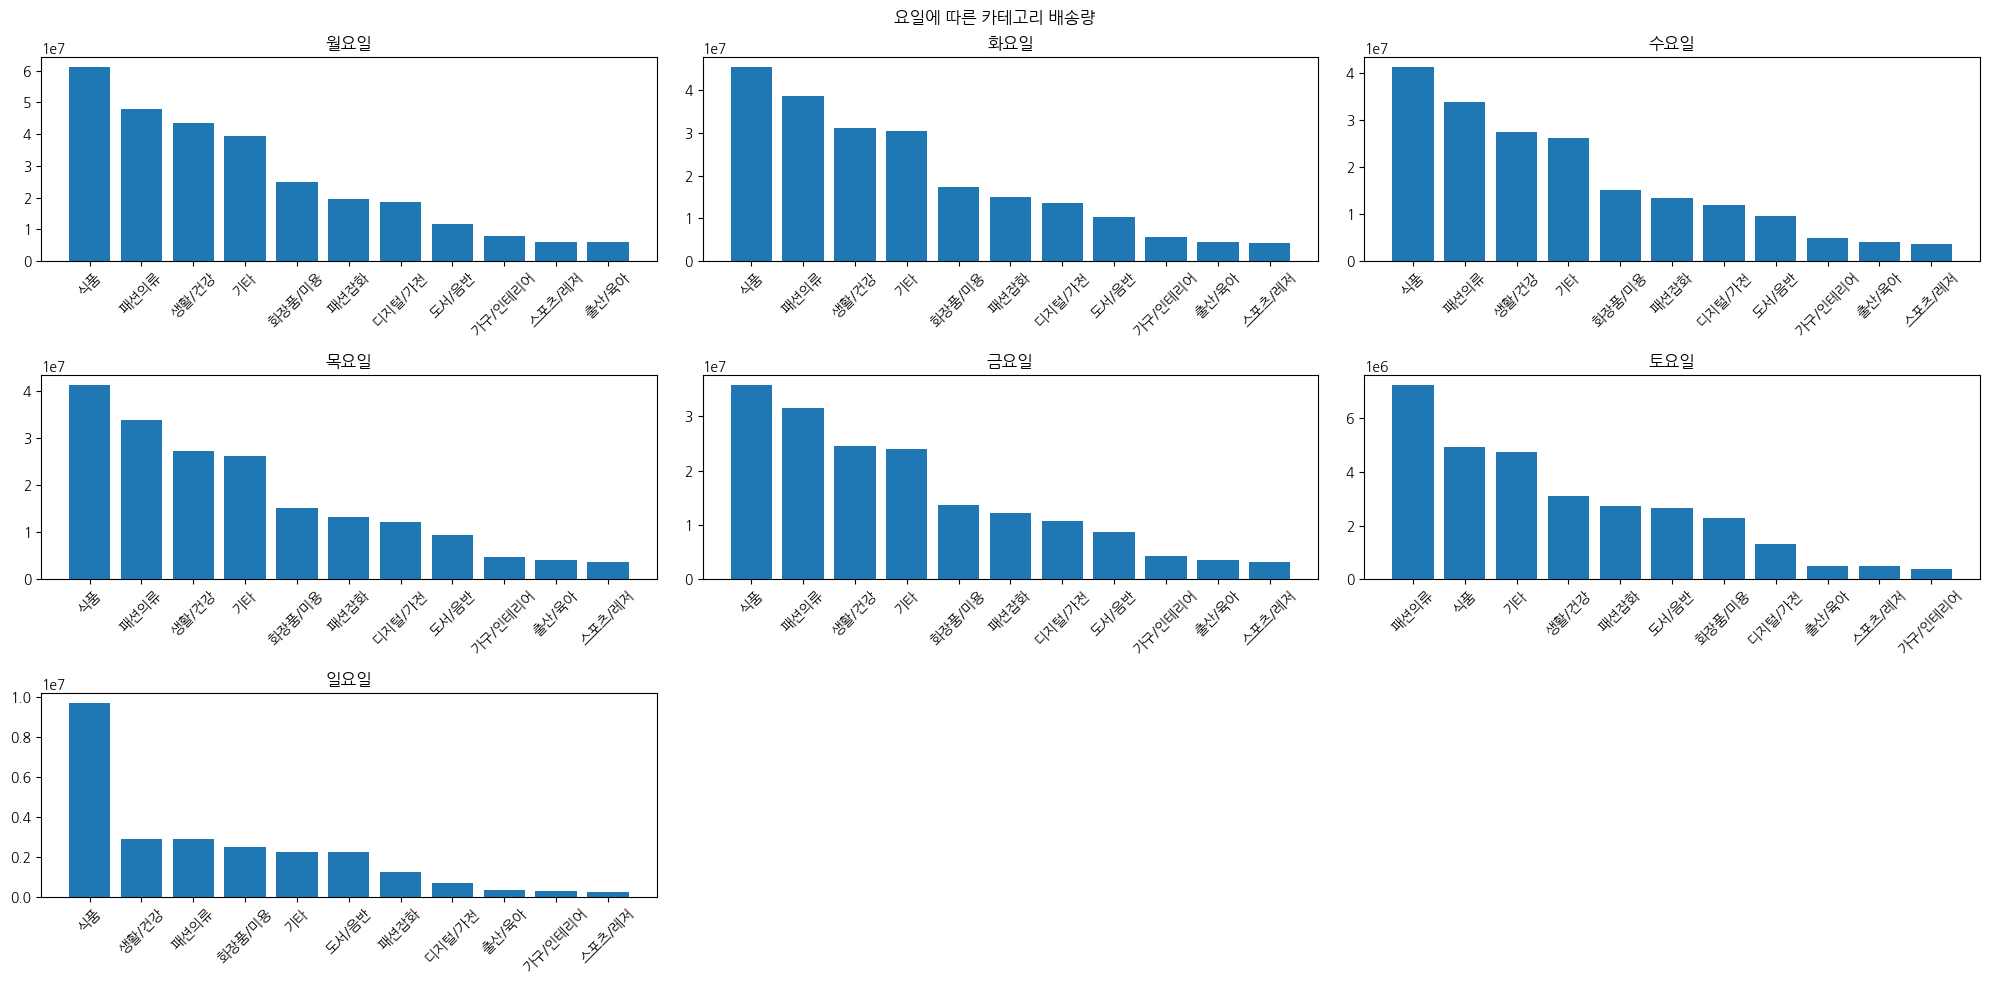

In [ ]:
# 시각화
fig = plt.figure(figsize=(20,10))
plt.suptitle('요일에 따른 카테고리 배송량')

fig.add_subplot(3,3,1)
plt.title('월요일')
plt.bar(monday.index, monday.values)
plt.xticks(rotation=45)

fig.add_subplot(3,3,2)
plt.title('화요일')
plt.bar(tuesday.index, tuesday.values)
plt.xticks(rotation=45)

fig.add_subplot(3,3,3)
plt.title('수요일')
plt.bar(wednesday.index, wednesday.values)
plt.xticks(rotation=45)

fig.add_subplot(3,3,4)
plt.title('목요일')
plt.bar(thursday.index, thursday.values)
plt.xticks(rotation=45)

fig.add_subplot(3,3,5)
plt.title('금요일')
plt.bar(friday.index, friday.values)
plt.xticks(rotation=45)

fig.add_subplot(3,3,6)
plt.title('토요일')
plt.bar(saturday.index, saturday.values)
plt.xticks(rotation=45)

fig.add_subplot(3,3,7)
plt.title('일요일')
plt.bar(sunday.index, sunday.values)
plt.xticks(rotation=45)

plt.tight_layout()

# 요일별 평균 배송량 분석

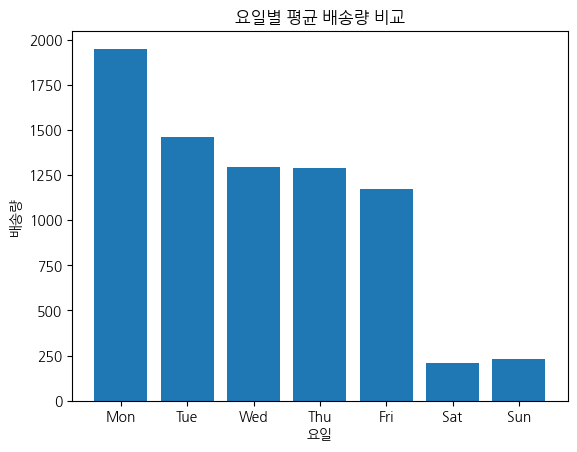

In [ ]:
# 요일별 분석
import numpy as np
data['요일'] = pd.to_datetime(data['배송년월일']).dt.day_name()
data.head()

# 요일별로 나누기
mon = data[data.요일 == 'Monday']['총합'].mean()
tue = data[data.요일 == 'Tuesday']['총합'].mean()
wed = data[data.요일 == 'Wednesday']['총합'].mean()
thu = data[data.요일 == 'Thursday']['총합'].mean()
fri = data[data.요일 == 'Friday']['총합'].mean()
sat = data[data.요일 == 'Saturday']['총합'].mean()
sun = data[data.요일 == 'Sunday']['총합'].mean()

week = [mon, tue, wed, thu, fri, sat, sun]
week = pd.DataFrame(week)
week.columns = ['배송량']

label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
index = np.arange(len(label))

plt.rc('font', family='NanumGothic')
plt.bar(index, week['배송량'])
plt.xlabel('요일')
plt.ylabel('배송량')
plt.title('요일별 평균 배송량 비교')
plt.xticks(index, label)

plt.show()


# 요일별 배송량 상위 구

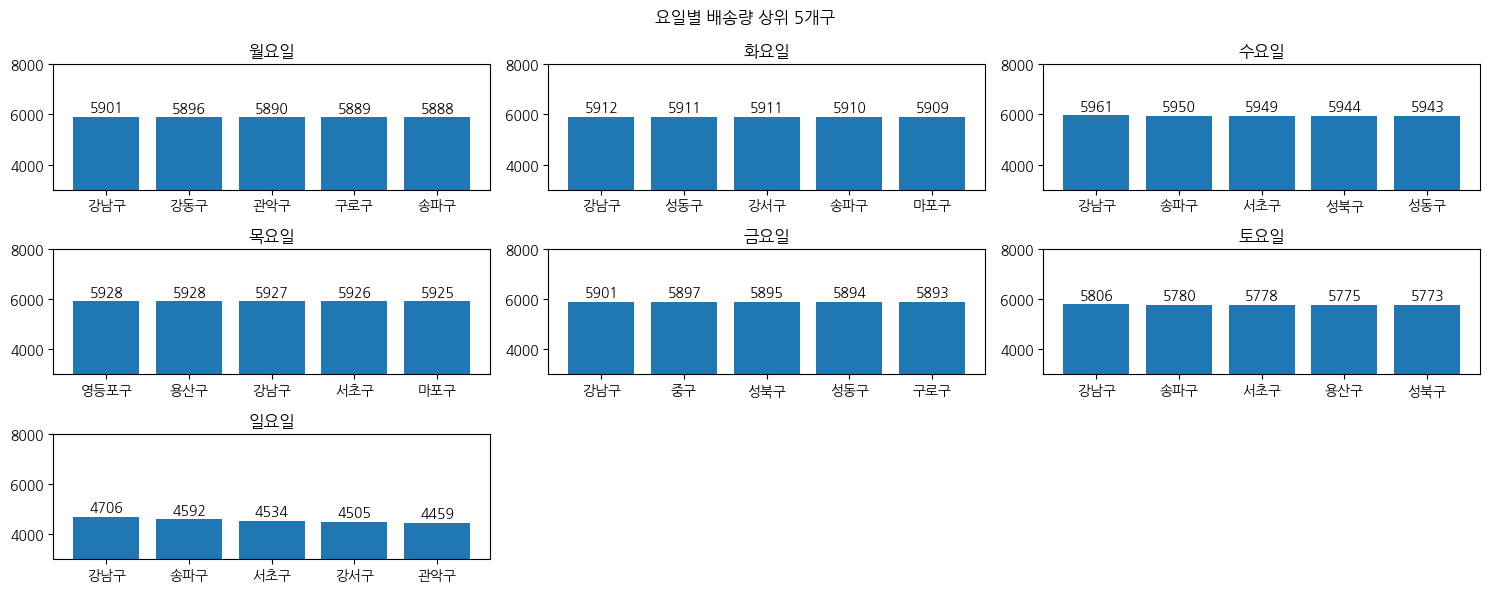

In [ ]:
# 요일별 분석(2)
mon = data[data['요일'] == 'Monday']['구명']
mon = mon.value_counts()
monday = mon.sort_values(ascending=False).nlargest(5)

tue = data[data['요일'] == 'Tuesday']['구명']
tue = tue.value_counts()
tuesday = tue.sort_values(ascending=False).nlargest(5)

wed = data[data['요일'] == 'Wednesday']['구명']
wed = wed.value_counts()
wednesday = wed.sort_values(ascending=False).nlargest(5)

thu = data[data['요일'] == 'Thursday']['구명']
thu = thu.value_counts()
thursday = thu.sort_values(ascending=False).nlargest(5)

fri = data[data['요일'] == 'Friday']['구명']
fri = fri.value_counts()
friday = fri.sort_values(ascending=False).nlargest(5)

sat = data[data['요일'] == 'Saturday']['구명']
sat = sat.value_counts()
saturday = sat.sort_values(ascending=False).nlargest(5)

sun = data[data['요일'] == 'Sunday']['구명']
sun = sun.value_counts()
sunday = sun.sort_values(ascending=False).nlargest(5)


# 시각화
fig = plt.figure(figsize=(15,6))
plt.suptitle('요일별 배송량 상위 5개구')


fig.add_subplot(3,3,1)
plt.title('월요일')
plt.ylim(3000,8000)
plt.bar(monday.index, monday.values)
for i, value in enumerate(monday.values):
    plt.text(i, value + 100, str(value), ha='center', va='bottom')

fig.add_subplot(3,3,2)
plt.title('화요일')
plt.ylim(3000,8000)
plt.bar(tuesday.index, tuesday.values)
for i, value in enumerate(tuesday.values):
    plt.text(i, value + 100, str(value), ha='center', va='bottom')

fig.add_subplot(3,3,3)
plt.title('수요일')
plt.ylim(3000,8000)
plt.bar(wednesday.index, wednesday.values)
for i, value in enumerate(wednesday.values):
    plt.text(i, value + 100, str(value), ha='center', va='bottom')

fig.add_subplot(3,3,4)
plt.title('목요일')
plt.ylim(3000,8000)
plt.bar(thursday.index, thursday.values)
for i, value in enumerate(thursday.values):
    plt.text(i, value + 100, str(value), ha='center', va='bottom')

fig.add_subplot(3,3,5)
plt.title('금요일')
plt.ylim(3000,8000)
plt.bar(friday.index, friday.values)
for i, value in enumerate(friday.values):
    plt.text(i, value + 100, str(value), ha='center', va='bottom')

fig.add_subplot(3,3,6)
plt.title('토요일')
plt.ylim(3000,8000)
plt.bar(saturday.index, saturday.values)
for i, value in enumerate(saturday.values):
    plt.text(i, value + 100, str(value), ha='center', va='bottom')

fig.add_subplot(3,3,7)
plt.title('일요일')
plt.ylim(3000,8000)
plt.bar(sunday.index, sunday.values)
for i, value in enumerate(sunday.values):
    plt.text(i, value + 100, str(value), ha='center', va='bottom')

plt.tight_layout()



# 강남구 기계학습

In [ ]:
# 강남구 기계학습
gn = data[data.구명 == '강남구']
gn = gn[['배송년월일','총합']]
gn.rename(columns={'배송년월일':'ds', '총합':'y'},inplace=True)

# 라이브러리 호출
from prophet import Prophet
m = Prophet()

# 학습
m.fit(gn)
future = m.make_future_dataframe(periods=1000)

# 예측
forecast = m.predict(future)
forecast[['ds','trend','trend_upper', 'trend_lower']].tail()

from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m,forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5_wsefe/6cxy2kil.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5_wsefe/67qmjmj5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43543', 'data', 'file=/tmp/tmpe5_wsefe/6cxy2kil.json', 'init=/tmp/tmpe5_wsefe/67qmjmj5.json', 'output', 'file=/tmp/tmpe5_wsefe/prophet_modely421a62u/prophet_model-20231121001306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:13:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:13:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj8fqaxzj/60_li6k1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj8fqaxzj/9ssgxd6s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29161', 'data', 'file=/tmp/tmpj8fqaxzj/60_li6k1.json', 'init=/tmp/tmpj8fqaxzj/9ssgxd6s.json', 'output', 'file=/tmp/tmpj8fqaxzj/prophet_modeljz3_25va/prophet_model-20231121063239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:32:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:32:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


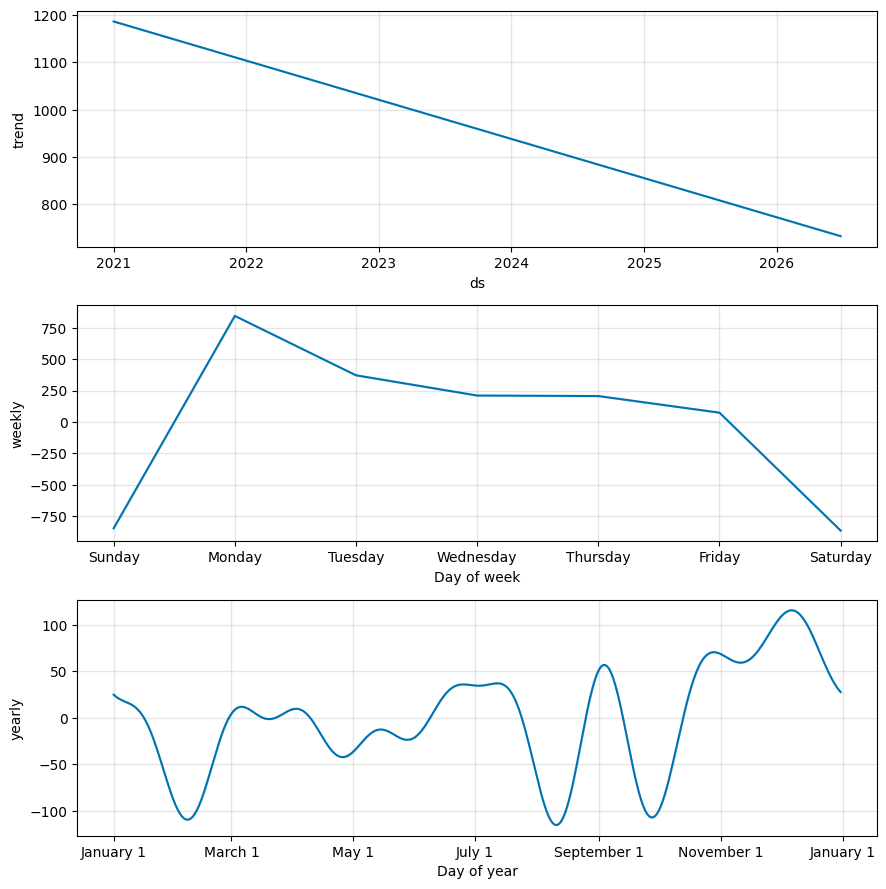

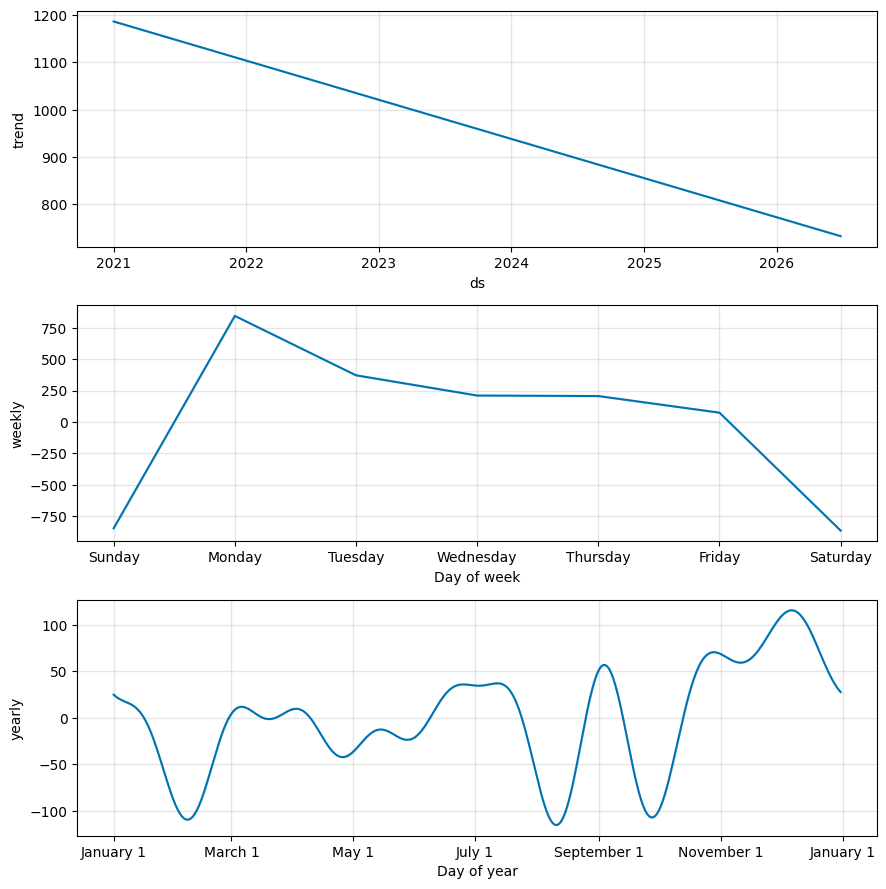

In [ ]:
# 데이터를 그룹별로 묶어서 '총합'의 평균을 계산
# df = data.groupby('배송년월일')['총합'].mean().reset_index()

# '총합' 컬럼을 'y'로 이름 변경
data.rename(columns={'총합': 'y'}, inplace=True)

# 결과 확인
df = data
df.rename(columns={'배송년월일':'ds'},inplace=True)
df.head()

from prophet import Prophet
m = Prophet()
m.fit(data)

future = m.make_future_dataframe(periods=1000)
m.predict(future)
future.tail()

forecast = m.predict(future)
m.plot_components(forecast)